In [82]:
# Common Functions

#Numpy array to DataFrame
def Array2DataFrame(array):
    import numpy as np
    df = pd.DataFrame(data=array)
    return df


#Numpy array to DataFrame to SaveFile
def Array2SaveCSV(NpArray,filename='Delete'):
    import numpy as np
    df = pd.DataFrame(data=NpArray)
    df.to_csv(filename)

    

# Deep Nural Network_Regression 
# Nuron Layers   (Nodes_Nuron and Activation Function) |Nurons_Layerof hidden layers Only
# predictors and target in nparray format
# Activation= 'relu' 'sigmodial' 'tanh'
# Return Model with Trained -> just do prediction
#10
def DeepNetwork_Reg(predictors,target,layers=5,Nurons_Layer=[(100,'relu'),(100,'relu'),(100,'relu'),(100,'relu'),(100,'relu')]
                   ,optimizer='adam', loss='mean_squared_error'):
    from keras.layers import Dense
    from keras.models import Sequential
    
    n_cols = predictors.shape[1]
    model= Sequential()
    model.add(Dense(Nurons_Layer[0][0], activation=Nurons_Layer[0][1],input_shape=(n_cols,))) 
    for i in range(layers-1):
        model.add(Dense(Nurons_Layer[i][0], activation=Nurons_Layer[i][1]))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model




# Deep Learning Classification
# optimizer = 'sgd' 'adam'    #optimizer( optimizer, LearningRate)
# SGD    lr=0.01 Default if not defined  
# Loss function :: Categorical_crossentropy
# 10.1
def DeepNetwork_Clas(predictors,target,layers=5,Nurons_Layer=[(100,'relu'),(100,'relu'),(100,'relu'),(100,'relu'),(100,'relu')]
                   ,activation_output='softmax',optimizer=('sgd',0.01), loss='categorical_crossentropy'):
    from keras.layers import Dense
    from keras.models import Sequential
    from keras.utils import to_categorical
    from keras.optimizers import SGD
    
    target=to_categorical(target) # Convertion 
    
    n_cols = predictors.shape[1]
    model= Sequential()
    model.add(Dense(Nurons_Layer[0][0], activation=Nurons_Layer[0][1],input_shape=(n_cols,))) 
    for i in range(layers-1):
        model.add(Dense(Nurons_Layer[i][0], activation=Nurons_Layer[i][1]))
    model.add(Dense(target.shape[1],activation=activation_output))
    if (optimizer[0]=='sgd'):
        model.compile(optimizer=SGD(lr=optimizer[1]), loss=loss)
    else:
        model.compile(optimizer=optimizer, loss=loss)
        #Learning rate Dosent works #Update Later
            
    return model


In [43]:
#Deep_Learning_Keras 
#1 Arch : how many layers Activation
#2 Compile :: loss and how it works
#3 Fit :: Froword and Back 
#4 Predict

#MIT Licensed

#Scale Data :: Getting data in to similar average value
 
#Regression       Y=f(x)
#Classification  Predictiong from set of descrete Options

#Deep Learning on Large Data Set

In [44]:
#1.1
#import
import numpy as np
import pandas
from keras.layers import Dense
from keras.models import Sequential

In [45]:
#1.2
#Import Data
df = pandas.read_csv('hourly_wages.csv')
predictors=np.delete(df.values,0,1) # Detete a Column  [1->column 0->row]
target=df.values[:,0]
n_cols = predictors.shape[1]

In [46]:
#1.3
#1 Arch

# Model 1)Sequential 2)  Check other models very complex connections  Very important   ??????????
model = Sequential()

# Dense :: All the Nodes in previous layers connect all the nodes in the current layer
model.add(Dense(100, activation= 'relu',input_shape=(n_cols,))) # (n_cols,) = any no of rows\data
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

In [47]:
#1.4
#Compile
#2 Compile
#Optimizer Learing rate
#Adam is Best for Optimizer
#loss function Mean SquareError
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
#1.5
#Fit
#Do Forword and Backword Propogation
model.fit(predictors, target)


Epoch 1/1
534/534 [==============================] - 98s 184ms/step - loss: 27.1264


In [49]:
#1.6
#prediction
model.predict(predictors[0:10])

array([[  8.48613453],
       [ 11.24972343],
       [  7.92303801],
       [  8.43539429],
       [ 10.4601059 ],
       [ 10.11528206],
       [ 10.028265  ],
       [  9.39352798],
       [ 12.23272514],
       [  9.39352798]], dtype=float32)

In [ ]:
#1.8 
#Saving 
model.save('model_hourly_wages.h5')
# model.save_weights("model.h5")


In [ ]:
#1.9
#Loading Model
from keras.models import load_model
my_model=load_model('model_hourly_wages.h5')
# loaded_model.load_weights("model.h5")

In [21]:
#1.10
#Check the Architure of Model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [22]:
#1.11
# Print
print("Loss function: " + model.loss)


Loss function: mean_squared_error


In [2]:
#3
#Hourly_wages
import numpy as np
import pandas
from keras.layers import Dense
from keras.models import Sequential

#Import Data
df = pandas.read_csv('hourly_wages.csv')
predictors=np.delete(df.values,0,1) # Detete a Column  [1->column 0->row]
target=df.values[:,0] # or # df.wage_per_hour
n_cols = predictors.shape[1]

# Model
model = Sequential()
model.add(Dense(100, activation= 'relu',input_shape=(n_cols,))) 
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

#compile
model.compile(optimizer='adam', loss='mean_squared_error')

#Fit
model.fit(predictors, target)

Epoch 1/1
534/534 [==============================] - 1s 1ms/step - loss: 50.6288


In [48]:
df.values
df.describe()
df.index
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [8]:
#4
# Categorical
# Single -> Multi Column Convertion
from keras.utils import to_categorical
a=np.array([1,2,3])
cat1=to_categorical(a)
print(a)
print(cat1)

b=np.array([0,1,2,3])
cat2=to_categorical(b)
print("\n",b)
print(cat2)

c=np.array([0,1,2,13])
cat3=to_categorical(c)
print("\n",c)
print(cat3)

[1 2 3]
[[ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

 [0 1 2 3]
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

 [ 0  1  2 13]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [94]:
#5
# Classification 
# To Select from Bunch of Options
# Similar to Regression Only Few things are Different
# Loss function :: Categorical_crossentropy
# Log Loss
# Metric = ['accuracy'] Print accuracy at end of each epoch
# optimizer = 'sgd' 'adam'
# Output  Have Softmax activation  = Pridiction Sum to One  :: To Check Proabilities 

In [86]:
# 5
# Titanic
# sgd :: Stochastic Gradient descent
#Output  : Dead or Alive    Yes or No
import numpy as np
import pandas
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

#Import Data
df = pandas.read_csv('Titanic_data.csv')
predictors=np.delete(df.values,0,1) # Detete a Column  [1->column 0->row]
target=to_categorical(df.survived)
pred_data=np.delete(pandas.read_csv('Titanic_pred_data.csv').values,0,1)
n_cols = predictors.shape[1]

#
model= Sequential()
model.add(Dense(32,activation='relu',input_shape=(n_cols,)))
model.add(Dense(2,activation='softmax')) # Output Survived or Died

#
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

#
model.fit(predictors, target)

#
predictions = model.predict(pred_data)
probability_true =predictions

#Print
print("data\n",df.head(2))
print("\nPredictors\n",predictors[0])
print("\nTarget\n",target[0])
print("\nPredictors Shape\n",predictions.shape)
print("\nProbabilities of Survival\nYes  No\n",probability_true[0:2])

Epoch 1/1
891/891 [==============================] - 1s 2ms/step - loss: 2.5718 - acc: 0.6128
data
    survived  pclass   age  sibsp  parch     fare  male  age_was_missing  \
0         0       3  22.0      1      0   7.2500     1            False   
1         1       1  38.0      1      0  71.2833     0            False   

   embarked_from_cherbourg  embarked_from_queenstown  \
0                        0                         0   
1                        1                         0   

   embarked_from_southampton  
0                          1  
1                          0  

Predictors
 [3 22.0 1 0 7.25 1 False 0 0 1]

Target
 [ 1.  0.]

Predictors Shape
 (91, 2)

Probabilities of Survival
Yes  No
 [[  1.84627413e-06   9.99998212e-01]
 [  6.81351253e-10   1.00000000e+00]]


In [81]:
#6 Optimisation
# Smart Optimizer  'Adams'   'Stochastic graient descent SGD'
# Learning Rate
# Dying Nuron Problem i.e   NEURON -> 0  | No effect to out put |
# Vanishing gradiend i.e too low slopes updates almost to O | Ex tanhx function
# Lower value of loss function is Good

Unsupervised Instance Begin


In [57]:
#7 Learning Rates Different
# Titanic Data
from keras.optimizers import SGD # Import the SGD optimizer
import numpy as np
import pandas
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

#Import Data
df = pandas.read_csv('Titanic_data.csv')
predictors=np.delete(df.values,0,1) # Detete a Column  [1->column 0->row]
target=to_categorical(df.survived)
pred_data=np.delete(pandas.read_csv('Titanic_pred_data.csv').values,0,1)
n_cols = predictors.shape[1]



lr_to_test = [.000001, 0.01, 1,0.001]

for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    model= Sequential()
    model.add(Dense(32,activation='relu',input_shape=(n_cols,)))
    model.add(Dense(2,activation='softmax'))  
    my_optimizer = SGD(lr=lr) # Optimizear
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
    model.fit(predictors, target)




Testing model with learning rate: 0.000001

Epoch 1/1
891/891 [==============================] - 1s 690us/step - loss: 2.4169 - acc: 0.3838


Testing model with learning rate: 0.010000

Epoch 1/1
891/891 [==============================] - 1s 681us/step - loss: 2.5932 - acc: 0.5612


Testing model with learning rate: 1.000000

Epoch 1/1
891/891 [==============================] - 1s 673us/step - loss: 6.0605 - acc: 0.6105


Testing model with learning rate: 0.001000

Epoch 1/1
891/891 [==============================] - 1s 723us/step - loss: 0.8222 - acc: 0.6128


In [58]:
#Validation split Data
#Split data as per percentage
#8
model.fit(predictors, target,validation_split=0.3)

Train on 623 samples, validate on 268 samples
Epoch 1/1
623/623 [==============================] - 0s 441us/step - loss: 0.8026 - acc: 0.5859 - val_loss: 1.2996 - val_acc: 0.6493


In [59]:
#epochs
#Do Forword and backword Propogatin for Learning
#An epoch is one forward pass and one backward pass of all training examples
#One epoch consists of one full training cycle on the training set
#5 epochs as pybrain advice, the dataset will be divided into 5 subsets
#and the wights will update 5 times as maximum
#9
model.fit(predictors, target,validation_split=0.1,epochs=100)

Train on 801 samples, validate on 90 samples
Epoch 1/100
801/801 [==============================] - 0s 233us/step - loss: 0.8942 - acc: 0.6380 - val_loss: 1.3715 - val_acc: 0.3778
Epoch 2/100
801/801 [==============================] - 0s 106us/step - loss: 0.7440 - acc: 0.6180 - val_loss: 0.8801 - val_acc: 0.6333
Epoch 3/100
801/801 [==============================] - 0s 121us/step - loss: 0.7005 - acc: 0.6479 - val_loss: 0.8977 - val_acc: 0.6222
Epoch 4/100
801/801 [==============================] - 0s 111us/step - loss: 0.8095 - acc: 0.6242 - val_loss: 0.7381 - val_acc: 0.7444
Epoch 5/100
801/801 [==============================] - 0s 124us/step - loss: 0.7842 - acc: 0.6517 - val_loss: 0.6533 - val_acc: 0.6556
Epoch 6/100
801/801 [==============================] - 0s 108us/step - loss: 0.7776 - acc: 0.6529 - val_loss: 1.2642 - val_acc: 0.6333
Epoch 7/100
801/801 [==============================] - 0s 129us/step - loss: 0.8237 - acc: 0.6242 - val_loss: 0.8714 - val_acc: 0.6444
Epoch 8/10

In [60]:
#Early Stopping
#How many epoch before stopping training
#Call Early Stopping Through Callbacks  :: This take List as input
# optimization will automatically stop when it is no longer helpful
#9
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)
model.fit(predictors, target,validation_split=0.3, epochs=20,callbacks = [early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/20
623/623 [==============================] - 0s 116us/step - loss: 0.6854 - acc: 0.6629 - val_loss: 1.0468 - val_acc: 0.6418
Epoch 2/20
623/623 [==============================] - 0s 92us/step - loss: 0.7025 - acc: 0.6356 - val_loss: 0.5677 - val_acc: 0.7276
Epoch 3/20
623/623 [==============================] - 0s 90us/step - loss: 0.7164 - acc: 0.6340 - val_loss: 0.7875 - val_acc: 0.6418
Epoch 4/20
623/623 [==============================] - 0s 133us/step - loss: 0.6584 - acc: 0.6372 - val_loss: 0.5642 - val_acc: 0.7239
Epoch 5/20
623/623 [==============================] - 0s 122us/step - loss: 0.7065 - acc: 0.6469 - val_loss: 1.1013 - val_acc: 0.6418
Epoch 6/20
623/623 [==============================] - 0s 133us/step - loss: 0.7494 - acc: 0.6372 - val_loss: 0.5910 - val_acc: 0.7201
Epoch 7/20
623/623 [==============================] - 0s 138us/step - loss: 0.7202 - acc: 0.6501 - val_loss: 0.5774 - val_acc: 0.7276


In [50]:
# Deep Nural Network_Regression 
# Nuron Layers   (Nodes_Nuron and Activation Function) |Nurons_Layerof hidden layers Only
# predictors and target in nparray format
# Activation= 'relu' 'sigmodial' 'tanh'
# Return Model with Trained -> just do prediction
#10
def DeepNetwork_Reg(predictors,target,layers=5,Nurons_Layer=[(100,'relu'),(100,'relu'),(100,'relu'),(100,'relu'),(100,'relu')]
                   ,optimizer='adam', loss='mean_squared_error'):
    from keras.layers import Dense
    from keras.models import Sequential
    
    n_cols = predictors.shape[1]
    model= Sequential()
    model.add(Dense(Nurons_Layer[0][0], activation=Nurons_Layer[0][1],input_shape=(n_cols,))) 
    for i in range(layers-1):
        model.add(Dense(Nurons_Layer[i][0], activation=Nurons_Layer[i][1]))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model


# Deep Learning Classification
# optimizer = 'sgd' 'adam'    #optimizer( optimizer, LearningRate)
# SGD    lr=0.01 Default if not defined  
# Loss function :: Categorical_crossentropy
# 10.1
def DeepNetwork_Clas(predictors,target,layers=5,Nurons_Layer=[(100,'relu'),(100,'relu'),(100,'relu'),(100,'relu'),(100,'relu')]
                   ,activation_output='softmax',optimizer=('sgd',0.01), loss='categorical_crossentropy'):
    from keras.layers import Dense
    from keras.models import Sequential
    from keras.utils import to_categorical
    from keras.optimizers import SGD
    
    target=to_categorical(target) # Convertion 
    
    n_cols = predictors.shape[1]
    model= Sequential()
    model.add(Dense(Nurons_Layer[0][0], activation=Nurons_Layer[0][1],input_shape=(n_cols,))) 
    for i in range(layers-1):
        model.add(Dense(Nurons_Layer[i][0], activation=Nurons_Layer[i][1]))
    model.add(Dense(target.shape[1],activation=activation_output))
    if (optimizer[0]=='sgd'):
        model.compile(optimizer=SGD(lr=optimizer[1]), loss=loss)
    else:
        model.compile(optimizer=optimizer, loss=loss)
        #Learning rate Dosent works #Update Later
            
    return model

In [51]:
a=[(100,'relu')]

In [56]:
#Regression Function Calling
#11

import pandas
import numpy as np
df = pandas.read_csv('hourly_wages.csv')
predictors=np.delete(df.values,0,1) # Detete a Column  [1->column 0->row]
target=df.values[:,0] # or # df.wage_per_hour

A=DeepNetwork_Reg(predictors,target) #np arrays
A.summary()

#
A.predict(predictors)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_81 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_82 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_83 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_84 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 101       
Total params: 41,501
Trainable params: 41,501
Non-trainable params: 0
_________________________________________________________________


array([[ -9.24663603e-01],
       [ -1.42051113e+00],
       [  9.54150259e-02],
       [  7.86441714e-02],
       [ -6.08947098e-01],
       [ -1.20674372e-02],
       [ -1.23713923e+00],
       [ -4.19161320e-02],
       [  3.70910764e-03],
       [ -4.19161320e-02],
       [ -6.23576462e-01],
       [ -7.69156814e-01],
       [ -1.08366466e+00],
       [ -1.31182981e+00],
       [ -1.17579162e+00],
       [ -1.52612722e+00],
       [ -1.32978058e+00],
       [ -1.23463237e+00],
       [ -6.08316243e-01],
       [ -1.41528451e+00],
       [ -4.72852796e-01],
       [ -1.34747124e+00],
       [ -4.19161320e-02],
       [ -4.59509909e-01],
       [ -1.07139599e+00],
       [ -1.22200596e+00],
       [  1.81257129e-02],
       [ -1.23694491e+00],
       [  4.74543869e-02],
       [  1.08866394e-02],
       [ -2.15100095e-01],
       [ -1.79599071e+00],
       [ -9.10483658e-01],
       [  1.09482378e-01],
       [ -7.34625518e-01],
       [ -1.51706457e+00],
       [ -9.01911139e-01],
 

In [53]:
#Classification Function Calling
#12

import pandas
import numpy as np

#Import Data
df = pandas.read_csv('Titanic_data.csv')
predictors=np.delete(df.values,0,1) # Detete a Column  [1->column 0->row]
target=np.array(df.survived)

pred_data=np.delete(pandas.read_csv('Titanic_pred_data.csv').values,0,1)
n_cols = predictors.shape[1]
A=DeepNetwork_Clas(predictors,target)
A.summary()


#
pred_data=np.delete(pandas.read_csv('Titanic_pred_data.csv').values,0,1)
A.predict(pred_data)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 100)               1100      
_________________________________________________________________
dense_69 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_70 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_71 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_72 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_73 (Dense)             (None, 2)                 202       
Total params: 41,702
Trainable params: 41,702
Non-trainable params: 0
_________________________________________________________________


array([[ 0.16365631,  0.83634377],
       [ 0.226697  ,  0.77330297],
       [ 0.2181461 ,  0.78185397],
       [ 0.41411492,  0.58588511],
       [ 0.19812499,  0.80187505],
       [ 0.1588922 ,  0.84110785],
       [ 0.03326764,  0.96673232],
       [ 0.33062503,  0.66937494],
       [ 0.11663951,  0.88336051],
       [ 0.16361001,  0.83638996],
       [ 0.22205923,  0.77794075],
       [ 0.21500425,  0.78499579],
       [ 0.13044009,  0.86955994],
       [ 0.41949582,  0.58050424],
       [ 0.16779181,  0.83220822],
       [ 0.06773765,  0.9322623 ],
       [ 0.26770872,  0.73229134],
       [ 0.17482685,  0.82517314],
       [ 0.06051283,  0.93948722],
       [ 0.34818095,  0.65181911],
       [ 0.08022562,  0.91977435],
       [ 0.21753317,  0.78246683],
       [ 0.03610273,  0.96389729],
       [ 0.26221314,  0.73778689],
       [ 0.40886709,  0.59113288],
       [ 0.17580637,  0.8241936 ],
       [ 0.17658006,  0.82341993],
       [ 0.39613789,  0.60386205],
       [ 0.18549928,

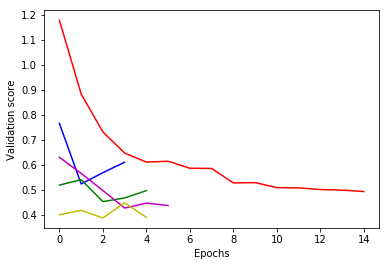

The Deeper the network the good the results
Lower Network Lower Newrons = Low accuracy -> Higher Nuron  Higher network = High accuracy


In [100]:
#12
import matplotlib.pyplot as plt

#Import Data
df = pandas.read_csv('Titanic_data.csv')
predictors=np.delete(df.values,0,1) # Detete a Column  [1->column 0->row]
target=to_categorical(df.survived)
pred_data=np.delete(pandas.read_csv('Titanic_pred_data.csv').values,0,1)
input_shape = (predictors.shape[1],)


# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

model_1 = Sequential()

# Add the first and second layers
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='softmax'))

# Compile model_2
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)






# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)



# Create the new model: model_3
model_3 = Sequential()

# Add the first and second layers
model_3.add(Dense(1000, activation='relu', input_shape=input_shape))
model_3.add(Dense(1000, activation='relu'))
model_3.add(Dense(1000, activation='relu'))
model_3.add(Dense(1000, activation='relu'))

# Add the output layer
model_3.add(Dense(2, activation='softmax'))

# Compile model_2
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model_2
model_3_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)



# Create the new model: model_4
model_4 = Sequential()

# Add the first and second layers
model_4.add(Dense(1000, activation='relu', input_shape=input_shape))
model_4.add(Dense(100, activation='relu'))
model_4.add(Dense(10, activation='relu'))
model_4.add(Dense(5, activation='relu'))

# Add the output layer
model_4.add(Dense(2, activation='softmax'))

# Compile model_2
model_4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model_2
model_4_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)




# Create the new model: model_4
model_5 = Sequential()

# Add the first and second layers
model_5.add(Dense(10000, activation='relu', input_shape=input_shape))
model_5.add(Dense(1000, activation='relu'))
model_5.add(Dense(100, activation='relu'))
model_5.add(Dense(50, activation='relu'))
model_5.add(Dense(50, activation='relu'))
# Add the output layer
model_5.add(Dense(2, activation='softmax'))

# Compile model_2
model_5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model_2
model_5_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)




###################
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r',
         model_2_training.history['val_loss'], 'b',
         model_3_training.history['val_loss'], 'g',
         model_4_training.history['val_loss'], 'm',
        model_5_training.history['val_loss'], 'y')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()
print("The Deeper the network the good the results")
print("Lower Network Lower Newrons = Low accuracy -> Higher Nuron  Higher network = High accuracy")

In [99]:
print(model_1_training.history['val_loss'],"\n",model_1_training.history['val_loss'],model_2_training.history['val_loss'],"\n",model_3_training.history['val_loss'])

[0.71540627765921905, 0.65235679276162684, 0.62005860212794894, 0.60594261391868809, 0.59707941489512695, 0.58152006158615621, 0.57295705186588142, 0.56013032444362532, 0.55599553458517492, 0.5420447827717445, 0.53369017419868336, 0.53235662932502492, 0.52697970331048172, 0.51699945680255999, 0.5166859799923178] 
 [0.71540627765921905, 0.65235679276162684, 0.62005860212794894, 0.60594261391868809, 0.59707941489512695, 0.58152006158615621, 0.57295705186588142, 0.56013032444362532, 0.55599553458517492, 0.5420447827717445, 0.53369017419868336, 0.53235662932502492, 0.52697970331048172, 0.51699945680255999, 0.5166859799923178] [0.60162672250630467, 0.53010120188723731, 0.5190721665347755, 0.6983629764791307, 0.52293257090632472] 
 [0.56619439527975113, 0.60155735901614138, 0.56589885230836923, 0.61120860736463323, 0.4367636383911751, 0.43831636652600164, 0.45236721768059546]


In [ ]:
# Model Validation
# Over Fitting    :: Only predicts to train data
# Under fitting   :: Dosen't predict to any data  i.e Train_Data or Predict_Data
# Model Capacity  :: Ability to predict    More capacity More Predicitbility
# Model Capacity  :: More Capacity more Patterans Captures
# Model Capacity :: Increase Layers and Increase More Nurons = Increases the Model capacity  || up to sertain Limits || Move lower to higher model
# Model Capacity :: Nothing But Decresing the Error ! 
# 13

In [15]:
# MNIST
# HANDWRITTEN_DATASET = 0 1 2 3 4 5 6 7 8 9 
# 28 X 28 = 784
# 784 pixels -> 10
# Download the actual MNIST data consist of 60000 data instead 2000
# 14

import pandas 
import numpy as np
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
#Import Data
df = pandas.read_csv('MNIST_HANDWRITTEN_NUMBER_DATA.csv',header=None)
X=np.delete(df.values,0,1) # Detete a Column  [1->column 0->row]
y=to_categorical(df[0])
pred_data=np.delete(pandas.read_csv('Titanic_pred_data.csv').values,0,1)



# Create the model: model
model = Sequential()
# Add the first hidden layer
model.add(Dense(100,activation='relu',input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(100,activation='relu'))

# Add the output layer
model.add(Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Fit the model

early_stopping_monitor = EarlyStopping(patience=3)
model.fit(X,y,validation_split=0.1,epochs=10,callbacks = [early_stopping_monitor])




Train on 1800 samples, validate on 201 samples
Epoch 1/10
1800/1800 [==============================] - 1s 628us/step - loss: 13.1329 - acc: 0.1761 - val_loss: 12.6921 - val_acc: 0.2090
Epoch 2/10
1800/1800 [==============================] - 0s 189us/step - loss: 11.9906 - acc: 0.2517 - val_loss: 10.9058 - val_acc: 0.3234
Epoch 3/10
1800/1800 [==============================] - 0s 172us/step - loss: 11.0790 - acc: 0.3100 - val_loss: 11.1234 - val_acc: 0.3035
Epoch 4/10
1800/1800 [==============================] - 0s 178us/step - loss: 10.9039 - acc: 0.3189 - val_loss: 10.7553 - val_acc: 0.3284
Epoch 5/10
1800/1800 [==============================] - 0s 206us/step - loss: 10.6295 - acc: 0.3372 - val_loss: 10.9982 - val_acc: 0.3134
Epoch 6/10
1800/1800 [==============================] - 1s 351us/step - loss: 10.6838 - acc: 0.3356 - val_loss: 10.8256 - val_acc: 0.3284
Epoch 7/10
1800/1800 [==============================] - 1s 344us/step - loss: 10.3334 - acc: 0.3572 - val_loss: 10.7775 - val

In [ ]:
#Plot Checks
# 14.1
plt.imshow(X[110].reshape(28,28))
plt.show()

In [17]:
# MNIST  # SGD base Optimizer
# HANDWRITTEN_DATASET = 0 1 2 3 4 5 6 7 8 9 
# 28 X 28 = 784
# 784 pixels -> 10
# Download the actual MNIST data consist of 60000 data instead 2000
# 14

import pandas 
import numpy as np
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
#Import Data
df = pandas.read_csv('MNIST_HANDWRITTEN_NUMBER_DATA.csv',header=None)
X=np.delete(df.values,0,1) # Detete a Column  [1->column 0->row]
y=to_categorical(df[0])
pred_data=np.delete(pandas.read_csv('Titanic_pred_data.csv').values,0,1)



# Create the model: model
model = Sequential()
# Add the first hidden layer
model.add(Dense(100,activation='relu',input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(100,activation='relu'))

# Add the output layer
model.add(Dense(10,activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
# Fit the model

early_stopping_monitor = EarlyStopping(patience=3)
model.fit(X,y,validation_split=0.3,epochs=10,callbacks = [early_stopping_monitor])




Train on 1400 samples, validate on 601 samples
Epoch 1/10
1400/1400 [==============================] - 1s 638us/step - loss: 13.1853 - acc: 0.1786 - val_loss: 12.6973 - val_acc: 0.2097
Epoch 2/10
1400/1400 [==============================] - 0s 223us/step - loss: 13.0212 - acc: 0.1893 - val_loss: 12.6692 - val_acc: 0.2113
Epoch 3/10
1400/1400 [==============================] - 0s 187us/step - loss: 12.9120 - acc: 0.1971 - val_loss: 12.2426 - val_acc: 0.2346
Epoch 4/10
1400/1400 [==============================] - 0s 179us/step - loss: 11.8364 - acc: 0.2579 - val_loss: 11.3791 - val_acc: 0.2912
Epoch 5/10
1400/1400 [==============================] - 0s 171us/step - loss: 11.3765 - acc: 0.2879 - val_loss: 11.2569 - val_acc: 0.2995
Epoch 6/10
1400/1400 [==============================] - 0s 193us/step - loss: 11.2561 - acc: 0.3000 - val_loss: 11.2531 - val_acc: 0.2995
Epoch 7/10
1400/1400 [==============================] - 0s 331us/step - loss: 11.2397 - acc: 0.2993 - val_loss: 11.4237 - val

In [126]:
# Convolute Nural Networks
# Kaggle :: Great place to find data sets
# Keras and Tensorflow have good examples in Github

(2001, 785)

In [ ]:
# Class 2
#
# Convolutions
# Convolutions are the basic building block for Deep learning
# Small Section apply on a image
# Convolutions are Like filters   :: Picks Patterans
#15

In [ ]:
#
from IPython.display import YouTubeVideo
YouTubeVideo('OVbiVIChkVY', width=800, height=450)

Original image


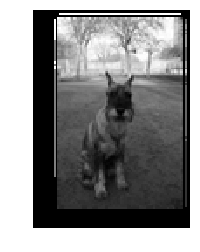

----------------------------
Filter: 
[[ 1  1]
 [-1 -1]]
Horizontal_Filters : 
Output: 


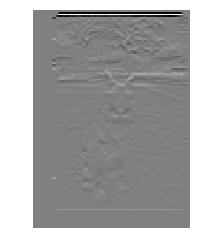

----------------------------
Filter: 
[[ 1 -1]
 [ 1 -1]]
Congrats.  That did it.
Vertical_Filters : 
Output: 


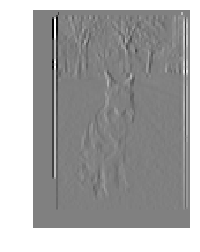


Horizontal + Vertical_Filters : 


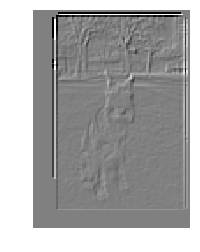

In [45]:
#Horizontal Filter !
#Vertical Filter !
#  1.5  1.5   +     Pixel  Pixel       = One Pixel
# -1.5 -1.5   +     Pixel  Pixel

#
#Better 3X3 Matrix to One Pixel Update

#
#16
import sys
from  exercise_1 import load_my_image, apply_conv_to_image, show, print_hints
from PIL import Image


# Detects bright pixels over dark pixels. 
horizontal_line_conv = [ [1, 1 ], 
                         [-1,-1] ]

vertical_line_conv = [ [1, -1] , 
                       [1, -1] ]
conv_list = [horizontal_line_conv]
# print(conv_list[0][0][0])
original_image = load_my_image('Dog_Image.png')
print("Original image")
show(original_image)
for conv in conv_list:
    filtered_image_h = apply_conv_to_image(conv, original_image)
    print("Horizontal_Filters : ")
    print("Output: ")
    show(filtered_image_h)

conv_list = [vertical_line_conv]
for conv in conv_list:
    filtered_image_v = apply_conv_to_image(conv, original_image)
    print("Vertical_Filters : ")
    print("Output: ")
    show(filtered_image_v)
print("\nHorizontal + Vertical_Filters : ")
show(filtered_image_v+filtered_image_h)

In [2]:
# Gradient Descent and BackPropogation -> Create Convolute
# Object Detection :: ImageNet
# TransforLearning
from os.path import join
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input

ModuleNotFoundError: No module named 'tensorflow.python.keras'

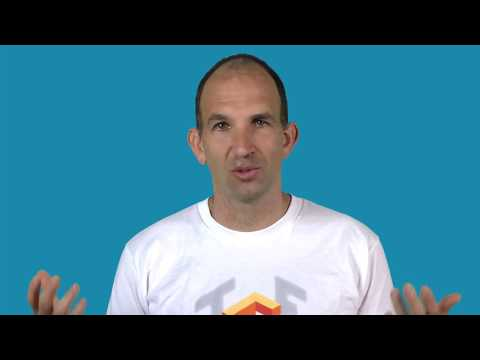

In [9]:
#Youtube Video Arranging Coads
from IPython.display import YouTubeVideo
YouTubeVideo('Epn3ryqr-F8', width=800, height=450)

In [26]:
from os.path import join

hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/hot_dog'

hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in 
                            ['1000288.jpg',
                             '127117.jpg']]

not_hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/not_hot_dog'
not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in
                            ['823536.jpg',
                             '99890.jpg']]

image_paths = hot_dog_paths + not_hot_dog_paths

In [2]:
from keras.applications.resnet50 import preprocess_input
from keras.applications import ResNet50
from keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    pass

# my_model=ResNet50()  # my_model.save('ResNet50_model.h5')
from keras.models import load_model
my_model=load_model('ResNet50_model.h5')

C:\Users\midas\Anaconda3\lib\site-packages\keras\models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


keras.engine.training.Model

In [22]:
load_img

<function keras.preprocessing.image.load_img>